In [36]:
import pandas as pd

In [112]:
df_forecasts = pd.read_csv("data/cherry_blossom_forecasts.csv")
df_places = pd.read_csv("data/cherry_blossom_places.csv")
df = pd.merge(df_forecasts, df_places, on="place_code")

# 日付をdatetime経由でエポック秒に変換
def time_2_epoc(time):
  return int(time.timestamp())

df["date"] = pd.to_datetime(df["date"]).dt.tz_localize('Asia/Tokyo').apply(time_2_epoc)
# df["kaika_date"] = pd.to_datetime(df["kaika_date"]).dt.tz_localize('Asia/Tokyo').apply(time_2_epoc)
# df["mankai_date"] = pd.to_datetime(df["mankai_date"]).dt.tz_localize('Asia/Tokyo').apply(time_2_epoc)

In [38]:
#データ概観
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32128 entries, 0 to 32127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   place_code     32128 non-null  int64  
 1   date           32128 non-null  int64  
 2   mankai_date    32128 non-null  int64  
 3   kaika_date     32128 non-null  int64  
 4   meter          32128 non-null  int64  
 5   tavg           29312 non-null  float64
 6   tmin           29312 non-null  float64
 7   tmax           29312 non-null  float64
 8   prcp           29184 non-null  float64
 9   prefecture_jp  32128 non-null  object 
 10  prefecture_en  32128 non-null  object 
 11  spot_name      32128 non-null  object 
 12  lat            32128 non-null  float64
 13  lon            32128 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 3.4+ MB


In [39]:
#基本統計量
df.describe()

,place_code,date,mankai_date,kaika_date,meter,tavg,tmin,tmax,prcp,lat,lon
count,3.212800e+04,3.212800e+04,3.212800e+04,3.212800e+04,32128.000000,29312.000000,29312.000000,29312.000000,29184.000000,32128.000000,32128.000000
mean,2.129831e+07,1.708052e+09,1.712352e+09,1.711761e+09,31.203561,6.128473,2.247707,10.237510,4.088521,35.765886,136.905433
std,1.210172e+07,7.977516e+05,7.505592e+05,8.171366e+05,13.979903,4.220031,4.340097,4.790049,7.837654,1.933009,3.282713
min,1.370010e+06,1.706713e+09,1.710601e+09,1.709737e+09,0.000000,-14.500000,-22.200000,-6.000000,0.000000,31.166074,129.556455
25%,1.137003e+07,1.707383e+09,1.711897e+09,1.711206e+09,20.000000,3.600000,-0.600000,7.000000,0.000000,34.689585,134.836260
50%,2.087002e+07,1.708052e+09,1.712070e+09,1.711465e+09,29.000000,5.800000,2.000000,10.000000,0.200000,35.475972,137.249463
75%,3.037000e+07,1.708722e+09,1.712675e+09,1.712070e+09,43.000000,8.400000,4.600000,13.000000,4.800000,36.558689,139.747486
max,4.637002e+07,1.709392e+09,1.715958e+09,1.715699e+09,93.000000,20.600000,17.800000,24.800000,140.500000,43.340985,143.292375


In [61]:
#いったんnull削除して相関係数とかみたい
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29184 entries, 0 to 32127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   place_code     29184 non-null  int64  
 1   date           29184 non-null  int64  
 2   mankai_date    29184 non-null  object 
 3   kaika_date     29184 non-null  object 
 4   meter          29184 non-null  int64  
 5   tavg           29184 non-null  float64
 6   tmin           29184 non-null  float64
 7   tmax           29184 non-null  float64
 8   prcp           29184 non-null  float64
 9   prefecture_jp  29184 non-null  object 
 10  prefecture_en  29184 non-null  object 
 11  spot_name      29184 non-null  object 
 12  lat            29184 non-null  float64
 13  lon            29184 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 3.3+ MB


,place_code,date,mankai_date,kaika_date,meter,tavg,tmin,tmax,prcp,prefecture_jp,prefecture_en,spot_name,lat,lon
165,13370001,1706713200,2024-04-01,2024-03-23,16,7.2,2.1,16.0,0.0,東京都,Tokyo Metropolis,国営昭和記念公園,35.712447,139.394880
166,13370003,1706713200,2024-03-31,2024-03-24,8,10.0,6.5,14.6,1.3,東京都,Tokyo Metropolis,西新井大師,35.780147,139.779995
167,13370005,1706713200,2024-04-04,2024-03-29,15,8.8,3.0,19.0,0.0,東京都,Tokyo Metropolis,塩田耕地堤の桜,35.739782,139.259070
168,13370051,1706713200,2024-03-31,2024-03-24,12,7.6,1.7,16.0,0.0,東京都,Tokyo Metropolis,よみうりランド,35.625748,139.517904
169,13370028,1706713200,2024-04-04,2024-03-28,0,10.9,6.0,16.0,0.0,東京都,Tokyo Metropolis,池上本門寺,35.578217,139.705880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31338,13370049,1709391600,2024-03-31,2024-03-25,53,6.7,1.4,11.5,0.0,東京都,Tokyo Metropolis,外濠公園,35.695125,139.739902
31339,13370052,1709391600,2024-03-31,2024-03-24,54,6.7,1.4,11.5,0.0,東京都,Tokyo Metropolis,六本木ヒルズ 毛利庭園・六本木さくら坂,35.660508,139.730734
31340,13370038,1709391600,2024-04-01,2024-03-23,56,6.7,1.4,11.5,0.0,東京都,Tokyo Metropolis,アークヒルズ,35.666558,139.739673
31341,13370053,1709391600,2024-04-01,2024-03-27,51,6.2,0.6,11.4,0.0,東京都,Tokyo Metropolis,仙台堀川公園,35.683938,139.839024


In [41]:
#相関行列
df_corr = pd.DataFrame({
  "date"       : df["date"],
  "mankai_date": df["mankai_date"],
  "kaika_date" : df["kaika_date"],
  "meter"      : df["meter"],
  "tavg"       : df["tavg"],
  "tmin"       : df["tmin"],
  "tmax"       : df["tmax"],
  "prcp"       : df["prcp"],
  "lat"        : df["lat"],
  "lon"        : df["lon"]
})
df_corr.corr()

,date,mankai_date,kaika_date,meter,tavg,tmin,tmax,prcp,lat,lon
date,1.000000e+00,-0.031246,-0.041339,0.895599,0.044180,0.070616,-0.014520,0.101378,-5.829060e-14,-8.792160e-14
mankai_date,-3.124580e-02,1.000000,0.979881,-0.246608,-0.492062,-0.475252,-0.459886,-0.035954,8.331928e-01,5.059291e-01
kaika_date,-4.133870e-02,0.979881,1.000000,-0.257786,-0.503168,-0.486563,-0.469533,-0.035850,8.497742e-01,5.121704e-01
meter,8.955995e-01,-0.246608,-0.257786,1.000000,0.078967,0.115462,0.025456,0.116023,-1.560442e-01,-8.599806e-02
tavg,4.418021e-02,-0.492062,-0.503168,0.078967,1.000000,0.868714,0.909429,0.149392,-5.524704e-01,-3.937098e-01
tmin,7.061582e-02,-0.475252,-0.486563,0.115462,0.868714,1.000000,0.650094,0.299435,-5.471323e-01,-4.353637e-01
tmax,-1.452012e-02,-0.459886,-0.469533,0.025456,0.909429,0.650094,1.000000,0.000214,-4.943883e-01,-2.972264e-01
prcp,1.013776e-01,-0.035954,-0.035850,0.116023,0.149392,0.299435,0.000214,1.000000,-6.882040e-02,-8.782760e-02
lat,-5.829060e-14,0.833193,0.849774,-0.156044,-0.552470,-0.547132,-0.494388,-0.068820,1.000000e+00,7.740033e-01
lon,-8.792160e-14,0.505929,0.512170,-0.085998,-0.393710,-0.435364,-0.297226,-0.087828,7.740033e-01,1.000000e+00


In [113]:
#不要な列の削除
#降水量はAPIからとってこれない
df = df.drop(columns=["place_code", "meter", "spot_name", "prefecture_en", "prcp"])

#カテゴリー型に指定
df["prefecture_jp"] = df["prefecture_jp"].astype("category")

In [114]:
#最新データでやってみる
max_date = max(df["date"])
df_latest = df[df["date"] == max_date]

df_latest[df_latest["prefecture_jp"] == "北海道"]

,date,mankai_date,kaika_date,tavg,tmin,tmax,prefecture_jp,lat,lon
31124,1709391600,2024-05-11,2024-05-07,-6.7,-10.7,-2.3,北海道,43.340985,141.895581
31125,1709391600,2024-05-02,2024-04-27,-3.3,-5.6,-1.0,北海道,41.797090,140.755737
31126,1709391600,2024-05-07,2024-05-03,-3.3,-5.6,-1.0,北海道,42.102654,140.575608
31127,1709391600,2024-05-09,2024-05-02,-4.0,-6.5,-2.0,北海道,42.522993,140.780671
31128,1709391600,2024-05-08,2024-05-05,NaN,NaN,NaN,北海道,42.403905,142.452358
31129,1709391600,2024-05-13,2024-05-06,-3.3,-6.4,-0.3,北海道,42.044628,143.292375
31130,1709391600,2024-05-08,2024-05-03,-6.8,-12.6,-3.1,北海道,43.122510,141.430820
31131,1709391600,2024-05-12,2024-05-04,-0.8,-1.7,0.4,北海道,42.130651,140.004744
31132,1709391600,2024-05-11,2024-05-05,NaN,NaN,NaN,北海道,42.256682,140.254997
31133,1709391600,2024-05-07,2024-05-02,NaN,NaN,NaN,北海道,42.101344,140.568418


In [24]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import xgboost as xgb
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

TEST_SIZE = 0.2
EVAL_METRICS = "mae"
ROUND = 1000
STOPPING_ROUND = 100

#lightGBMのモデルづくり
def create_lgb_model(df:pd.DataFrame, objectiv_col:str):
  train_x, train_y, val_x, val_y = split_data_frame(df, objectiv_col)
  trains = lgb.Dataset(train_x, train_y)
  valids = lgb.Dataset(val_x, val_y)

  params = {
    "objective": "regression",
    "metrics": EVAL_METRICS
  }

  print("train start!")
  model = lgb.train(params, trains, valid_sets=valids, num_boost_round=ROUND, callbacks=[lgb.early_stopping(stopping_rounds=STOPPING_ROUND)])
  print("train end!")
  vals = model.predict(val_x)
  print("mae↓")
  mae_second = mae(vals, val_y)
  print(mae_second)
  return model

#xgboostのモデルづくり
def create_xgb_model(df:pd.DataFrame, objectiv_col:str):
  train_x, train_y, val_x, val_y = split_data_frame(df, objectiv_col)
  dtrain = xgb.DMatrix(train_x, label=train_y, enable_categorical=1)
  dvalid = xgb.DMatrix(val_x, label=val_y, enable_categorical=1)

  params = {
    'objective': 'reg:squarederror',
    'silent':0, 
    'random_state':189, 
    'eval_metric': EVAL_METRICS
  }
  watchlist = [(dtrain, 'train'), (dvalid, 'eval')]#訓練データはdtrain、評価用のテストデータはdvalidと設定

  print("train start!")
  model = xgb.train(params, dtrain, ROUND, evals=watchlist, early_stopping_rounds=STOPPING_ROUND)
  print("train end!")
  vals = model.predict(dvalid)
  print("mae↓")
  mae_second = mae(vals, val_y)
  print(mae_second)
  return model

#トレーニングデータと検証用のテストデータに分割
def split_data_frame(df:pd.DataFrame, objectiv_col:str):
  df_train, df_val =train_test_split(df, test_size=TEST_SIZE)
  train_y = df_train[objectiv_col]
  train_x = df_train.drop(objectiv_col, axis=1)

  val_y = df_val[objectiv_col]
  val_x = df_val.drop(objectiv_col, axis=1)
  return [train_x, train_y, val_x, val_y]

In [45]:
OBJECTIVE_COL_MANKAI = "mankai_date"
OBJECTIVE_COL_KAIKA  = "kaika_date"


In [46]:
#①開花日予測　lightgbm
model = create_lgb_model(df_latest.drop(columns=OBJECTIVE_COL_MANKAI), OBJECTIVE_COL_KAIKA)
# 特徴量重要度出す
columns_list = df_latest.drop(columns=[OBJECTIVE_COL_KAIKA, OBJECTIVE_COL_MANKAI], axis=1).columns
pd.DataFrame(model.feature_importance(), index=columns_list, columns=["importance"]).sort_values("importance", ascending=False)


train start!
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 749
[LightGBM] [Info] Number of data points in the train set: 729, number of used features: 6
[LightGBM] [Info] Start training from score 1711665156.740741
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

,importance
lat,795
lon,609
tmax,238
tavg,225
tmin,153
prefecture_jp,86
date,0


train start!
[0]	train-mae:433643.28121	eval-mae:458612.10929
[1]	train-mae:333858.58985	eval-mae:362810.05464


[2]	train-mae:265313.27298	eval-mae:297837.81421
[3]	train-mae:220152.97668	eval-mae:255136.17486
[4]	train-mae:191698.87517	eval-mae:229395.58470
[5]	train-mae:171334.93553	eval-mae:215237.24590
[6]	train-mae:158773.37723	eval-mae:204286.60109
[7]	train-mae:148860.48834	eval-mae:198576.96175
[8]	train-mae:140463.23182	eval-mae:196572.32787
[9]	train-mae:133255.55007	eval-mae:193894.81967
[10]	train-mae:127780.52126	eval-mae:192308.45902
[11]	train-mae:123484.00549	eval-mae:190790.64481
[12]	train-mae:119017.70096	eval-mae:192764.50273
[13]	train-mae:115869.49794	eval-mae:194203.27869
[14]	train-mae:114116.12620	eval-mae:196634.57923
[15]	train-mae:111639.87929	eval-mae:197791.47541
[16]	train-mae:107846.23320	eval-mae:198555.97814
[17]	train-mae:104683.80796	eval-mae:198418.88525
[18]	train-mae:102579.79698	eval-mae:198616.83060
[19]	train-mae:100224.87791	eval-mae:197960.04372
[20]	train-mae:98538.05213	eval-mae:197620.10929
[21]	train-mae:97527.74760	eval-mae:197329.83607
[22]	train

c:\workspace\sakurasaku\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [12:43:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[62]	train-mae:52325.48697	eval-mae:200185.70492
[63]	train-mae:51941.13580	eval-mae:200366.86339
[64]	train-mae:51151.89026	eval-mae:200290.62295
[65]	train-mae:50470.27709	eval-mae:200470.38251
[66]	train-mae:49876.80658	eval-mae:200338.88525
[67]	train-mae:48749.73937	eval-mae:200412.32787
[68]	train-mae:47903.78052	eval-mae:200582.99454
[69]	train-mae:47345.25103	eval-mae:200304.61202
[70]	train-mae:46646.25514	eval-mae:200201.79235
[71]	train-mae:46192.37311	eval-mae:199829.68306
[72]	train-mae:45399.96708	eval-mae:199758.33880
[73]	train-mae:44649.34979	eval-mae:199477.85792
[74]	train-mae:44178.78738	eval-mae:199705.87978
[75]	train-mae:43517.01509	eval-mae:199935.30055
[76]	train-mae:43140.74074	eval-mae:199796.80874
[77]	train-mae:42873.67901	eval-mae:199540.10929
[78]	train-mae:42024.20850	eval-mae:200022.03279
[79]	train-mae:41745.73388	eval-mae:200194.09836
[80]	train-mae:41320.64746	eval-mae:199945.09290
[81]	train-mae:40651.67627	eval-mae:200124.15301
[82]	train-mae:40016

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

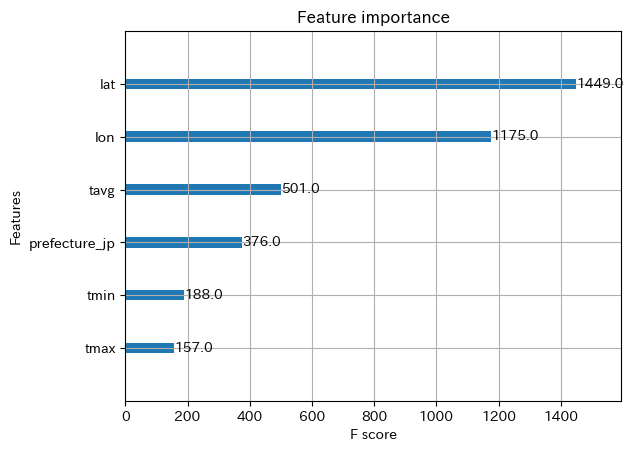

In [47]:
#②開花日予測　xgboost
model = create_xgb_model(df_latest.drop(columns=OBJECTIVE_COL_MANKAI), OBJECTIVE_COL_KAIKA)
# 特徴量重要度出す
xgb.plot_importance(model)

In [48]:
#③開花日予測　都道府県名いらなくするとどうなる？
#→一応精度落ちる
OBJECTIVE_COL_PREFECTURE = "prefecture_jp"
model = create_lgb_model(df_latest.drop(columns=[OBJECTIVE_COL_MANKAI, OBJECTIVE_COL_PREFECTURE]), OBJECTIVE_COL_KAIKA)
# 特徴量重要度出す
columns_list = df_latest.drop(columns=[OBJECTIVE_COL_KAIKA, OBJECTIVE_COL_MANKAI, OBJECTIVE_COL_PREFECTURE], axis=1).columns
pd.DataFrame(model.feature_importance(), index=columns_list, columns=["importance"]).sort_values("importance", ascending=False)


train start!
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 729, number of used features: 5
[LightGBM] [Info] Start training from score 1711674993.777778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

,importance
lat,592
lon,534
tmax,186
tavg,178
tmin,118
date,0


In [49]:
#④開花日予測　気温抜く
#→思ったより精度落ちないから抜いていいかも
OBJECTIVE_COL_TAVG = "tavg"
OBJECTIVE_COL_TMIN = "tmin"
OBJECTIVE_COL_TMAX = "tmax"
model = create_lgb_model(df_latest.drop(columns=[OBJECTIVE_COL_MANKAI, OBJECTIVE_COL_TAVG, OBJECTIVE_COL_TMIN, OBJECTIVE_COL_TMAX]), OBJECTIVE_COL_KAIKA)
# 特徴量重要度出す
columns_list = df_latest.drop(columns=[OBJECTIVE_COL_KAIKA, OBJECTIVE_COL_MANKAI, OBJECTIVE_COL_TAVG, OBJECTIVE_COL_TMIN, OBJECTIVE_COL_TMAX], axis=1).columns
pd.DataFrame(model.feature_importance(), index=columns_list, columns=["importance"]).sort_values("importance", ascending=False)


train start!
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 534
[LightGBM] [Info] Number of data points in the train set: 729, number of used features: 3
[LightGBM] [Info] Start training from score 1711694667.851852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

,importance
lat,464
lon,404
prefecture_jp,53
date,0


In [50]:
#⑤開花日予測　いろんなデータあったほうがいいの？
#→だいぶ改善する　データ量が正義
OBJECTIVE_COL_TAVG = "tavg"
OBJECTIVE_COL_TMIN = "tmin"
OBJECTIVE_COL_TMAX = "tmax"
model = create_lgb_model(df.drop(columns=[OBJECTIVE_COL_MANKAI, OBJECTIVE_COL_TAVG, OBJECTIVE_COL_TMIN, OBJECTIVE_COL_TMAX]), OBJECTIVE_COL_KAIKA)
# 特徴量重要度出す
columns_list = df_latest.drop(columns=[OBJECTIVE_COL_KAIKA, OBJECTIVE_COL_MANKAI, OBJECTIVE_COL_TAVG, OBJECTIVE_COL_TMIN, OBJECTIVE_COL_TMAX], axis=1).columns
pd.DataFrame(model.feature_importance(), index=columns_list, columns=["importance"]).sort_values("importance", ascending=False)

train start!
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 589
[LightGBM] [Info] Number of data points in the train set: 23347, number of used features: 4
[LightGBM] [Info] Start training from score 1711718209.943547
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 23664.6
train end!
mae↓
23664.86154194758秒
=0.2738988604392081日


,importance
lat,12753
lon,11153
date,4713
prefecture_jp,1381


train start!
[0]	train-mae:435716.05705	eval-mae:434895.64639
[1]	train-mae:332220.82289	eval-mae:330963.41819
[2]	train-mae:265188.65876	eval-mae:263911.35172
[3]	train-mae:222519.35683	eval-mae:221996.03358
[4]	train-mae:195219.23262	eval-mae:195427.55799
[5]	train-mae:174573.96805	eval-mae:174740.04317
[6]	train-mae:161579.76682	eval-mae:161735.66421
[7]	train-mae:152865.89832	eval-mae:153391.01593
[8]	train-mae:145655.37602	eval-mae:146545.81189
[9]	train-mae:140715.99709	eval-mae:141724.59551
[10]	train-mae:137371.76888	eval-mae:138723.99657
[11]	train-mae:134033.07251	eval-mae:135425.35960
[12]	train-mae:128543.66146	eval-mae:130318.34161
[13]	train-mae:126024.13329	eval-mae:128059.36200
[14]	train-mae:124617.92607	eval-mae:126497.13483
[15]	train-mae:122656.90050	eval-mae:124827.98150
[16]	train-mae:119736.32175	eval-mae:122367.73685
[17]	train-mae:117524.84448	eval-mae:120158.84324
[18]	train-mae:116098.40134	eval-mae:118616.15487
[19]	train-mae:112622.11607	eval-mae:115402.778

c:\workspace\sakurasaku\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [12:43:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)



[29]	train-mae:93206.51116	eval-mae:96302.44578
[30]	train-mae:92377.85823	eval-mae:95345.28559
[31]	train-mae:90234.11179	eval-mae:93102.24842
[32]	train-mae:88503.09367	eval-mae:91416.42899
[33]	train-mae:86693.03979	eval-mae:89469.06150
[34]	train-mae:84494.45188	eval-mae:87429.67963
[35]	train-mae:83230.02767	eval-mae:86059.41956
[36]	train-mae:81659.69624	eval-mae:84549.90989
[37]	train-mae:81095.22320	eval-mae:84031.26538
[38]	train-mae:80587.06095	eval-mae:83507.99383
[39]	train-mae:79678.63212	eval-mae:82605.28354
[40]	train-mae:78008.28886	eval-mae:80816.63868
[41]	train-mae:76973.59798	eval-mae:79842.28611
[42]	train-mae:75905.41997	eval-mae:78829.62344
[43]	train-mae:75464.04557	eval-mae:78332.09662
[44]	train-mae:74685.36017	eval-mae:77666.08874
[45]	train-mae:72996.90821	eval-mae:76047.89858
[46]	train-mae:72041.71362	eval-mae:75122.73291
[47]	train-mae:71440.55716	eval-mae:74740.20216
[48]	train-mae:69620.17424	eval-mae:72781.40963
[49]	train-mae:69030.50910	eval-mae:721

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

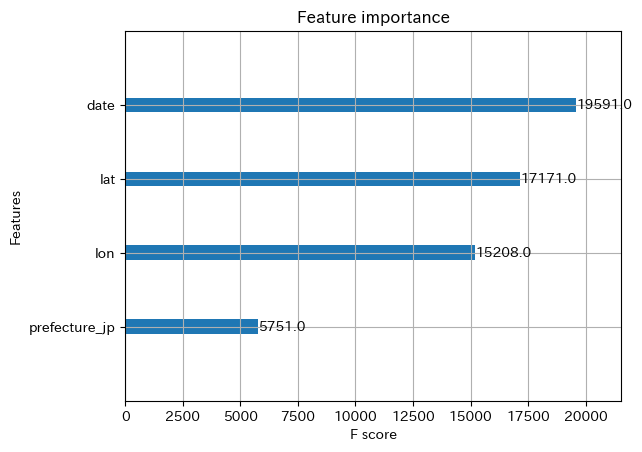

In [51]:
#⑥開花日予測　全データでXGBだと？
#→だいぶ改善する　データ量が正義
OBJECTIVE_COL_TAVG = "tavg"
OBJECTIVE_COL_TMIN = "tmin"
OBJECTIVE_COL_TMAX = "tmax"
model = create_xgb_model(df.drop(columns=[OBJECTIVE_COL_MANKAI, OBJECTIVE_COL_TAVG, OBJECTIVE_COL_TMIN, OBJECTIVE_COL_TMAX]), OBJECTIVE_COL_KAIKA)
# 特徴量重要度出す
xgb.plot_importance(model)

train start!


[0]	train-mae:435339.72707	eval-mae:443870.82131
[1]	train-mae:331303.49047	eval-mae:338623.74782
[2]	train-mae:261727.71354	eval-mae:267529.45143
[3]	train-mae:219102.24423	eval-mae:223298.92753
[4]	train-mae:190169.15647	eval-mae:193215.13380
[5]	train-mae:171171.48276	eval-mae:172894.86517
[6]	train-mae:159831.82422	eval-mae:161326.27034
[7]	train-mae:151133.52602	eval-mae:152732.79287
[8]	train-mae:144609.09513	eval-mae:146011.35652
[9]	train-mae:139358.68283	eval-mae:140991.24345
[10]	train-mae:134492.29246	eval-mae:136175.79441
[11]	train-mae:131945.83424	eval-mae:133582.06750
[12]	train-mae:129829.44001	eval-mae:131475.31951
[13]	train-mae:128118.20277	eval-mae:129551.24071
[14]	train-mae:125876.82940	eval-mae:127206.82542
[15]	train-mae:124246.53583	eval-mae:125421.60151
[16]	train-mae:121722.89579	eval-mae:123100.01439
[17]	train-mae:119475.18465	eval-mae:121022.69522
[18]	train-mae:117350.74211	eval-mae:118940.20079
[19]	train-mae:114469.76348	eval-mae:116048.37005
[20]	train

c:\workspace\sakurasaku\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [12:43:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[59]	train-mae:80068.48743	eval-mae:82375.51071
[60]	train-mae:79863.60081	eval-mae:82123.17286
[61]	train-mae:79372.41239	eval-mae:81663.71492
[62]	train-mae:79113.98364	eval-mae:81415.49974
[63]	train-mae:78069.79158	eval-mae:80270.82405
[64]	train-mae:77962.82246	eval-mae:80170.76169
[65]	train-mae:77231.94449	eval-mae:79482.03529
[66]	train-mae:76689.82910	eval-mae:79059.70327
[67]	train-mae:76436.73483	eval-mae:78722.74113
[68]	train-mae:76169.49021	eval-mae:78481.28011
[69]	train-mae:75850.64976	eval-mae:78096.86346
[70]	train-mae:75489.97781	eval-mae:77749.94552
[71]	train-mae:74872.59862	eval-mae:77186.69728
[72]	train-mae:74145.84897	eval-mae:76531.23728
[73]	train-mae:73892.50251	eval-mae:76311.33253
[74]	train-mae:73515.38305	eval-mae:75940.02947
[75]	train-mae:73212.73243	eval-mae:75700.10348
[76]	train-mae:73129.73281	eval-mae:75606.66370
[77]	train-mae:72976.82580	eval-mae:75504.38650
[78]	train-mae:72894.18803	eval-mae:75371.12352
[79]	train-mae:72691.34638	eval-mae:7520

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

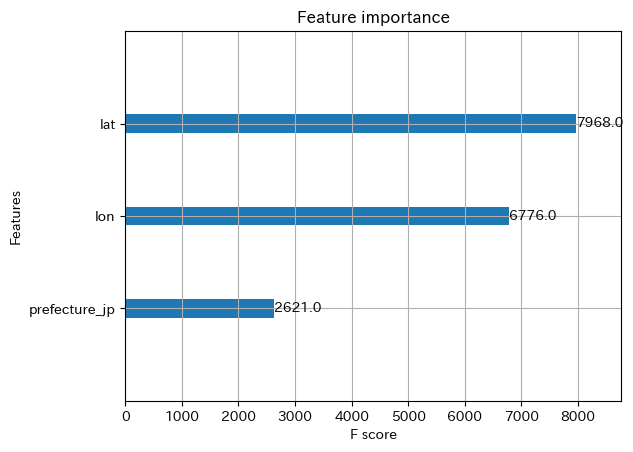

In [52]:
#⑥開花日予測　Date抜くと？
#→dateはあったほうがいい
OBJECTIVE_COL_TAVG = "tavg"
OBJECTIVE_COL_TMIN = "tmin"
OBJECTIVE_COL_TMAX = "tmax"
OBJECTIVE_COL_DATE = "date"
model = create_xgb_model(df.drop(columns=[OBJECTIVE_COL_MANKAI, OBJECTIVE_COL_TAVG, OBJECTIVE_COL_TMIN, OBJECTIVE_COL_TMAX, OBJECTIVE_COL_DATE]), OBJECTIVE_COL_KAIKA)
# 特徴量重要度出す
xgb.plot_importance(model)

In [53]:
#⑥開花日予測　lightgbmでdate抜くと？
#→dateはあったほうがいい
OBJECTIVE_COL_TAVG = "tavg"
OBJECTIVE_COL_TMIN = "tmin"
OBJECTIVE_COL_TMAX = "tmax"
OBJECTIVE_COL_DATE = "date"
model = create_lgb_model(df.drop(columns=[OBJECTIVE_COL_MANKAI, OBJECTIVE_COL_TAVG, OBJECTIVE_COL_TMIN, OBJECTIVE_COL_TMAX, OBJECTIVE_COL_DATE]), OBJECTIVE_COL_KAIKA)
columns_list = df_latest.drop(columns=[OBJECTIVE_COL_KAIKA, OBJECTIVE_COL_MANKAI, OBJECTIVE_COL_TAVG, OBJECTIVE_COL_TMIN, OBJECTIVE_COL_TMAX, OBJECTIVE_COL_DATE], axis=1).columns
pd.DataFrame(model.feature_importance(), index=columns_list, columns=["importance"]).sort_values("importance", ascending=False)

train start!
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 556
[LightGBM] [Info] Number of data points in the train set: 23347, number of used features: 3
[LightGBM] [Info] Start training from score 1711714294.613955
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[919]	valid_0's l1: 65203.9
train end!
mae↓
65204.25607741792秒
=0.7546788897849296日


,importance
lat,14610
lon,11785
prefecture_jp,1175


In [54]:
#④開花日予測　気温抜く
#→思ったより精度落ちないから抜いていいかも
OBJECTIVE_COL_TAVG = "tavg"
OBJECTIVE_COL_TMIN = "tmin"
OBJECTIVE_COL_TMAX = "tmax"
model = create_lgb_model(df_latest.drop(columns=[OBJECTIVE_COL_DATE, OBJECTIVE_COL_MANKAI, OBJECTIVE_COL_TAVG, OBJECTIVE_COL_TMIN, OBJECTIVE_COL_TMAX]), OBJECTIVE_COL_KAIKA)
# 特徴量重要度出す
columns_list = df_latest.drop(columns=[OBJECTIVE_COL_KAIKA, OBJECTIVE_COL_DATE, OBJECTIVE_COL_MANKAI, OBJECTIVE_COL_TAVG, OBJECTIVE_COL_TMIN, OBJECTIVE_COL_TMAX], axis=1).columns
pd.DataFrame(model.feature_importance(), index=columns_list, columns=["importance"]).sort_values("importance", ascending=False)


train start!
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 534
[LightGBM] [Info] Number of data points in the train set: 729, number of used features: 3
[LightGBM] [Info] Start training from score 1711674519.703704
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

,importance
lat,1491
lon,1485
prefecture_jp,143


In [57]:
df_test = pd.DataFrame([{
  "lat": 35.6542263,
  "prefecture_jp": "東京都"
}])
df_test["prefecture_jp"] = df_test["prefecture_jp"].astype("category")
predict = model.predict(df_test)
predict
df_test["kaika_date"] = pd.to_datetime(int(predict), unit="s", utc=True).tz_convert('Asia/Tokyo')
df_test

C:\Users\watar\AppData\Local\Temp\ipykernel_28396\4105233424.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  df_test["kaika_date"] = pd.to_datetime(int(predict), unit="s", utc=True).tz_convert('Asia/Tokyo')


,lat,lon,prefecture_jp,kaika_date
0,35.654226,139.705338,東京都,2024-04-24 02:48:06+09:00


In [102]:
import pandas as pd
df_forecasts = pd.read_csv("data/cherry_blossom_forecasts.csv")
df_places = pd.read_csv("data/cherry_blossom_places.csv")
df = pd.merge(df_forecasts, df_places, on="place_code")

COL_DATE   = "date"
COL_KAIKA  = "kaika_date"
COL_MANKAI = "mankai_date"

In [103]:
from datetime import timedelta
# 最新日のみにフィルタリング
max_date = max(df[COL_DATE])
df = df[df[COL_DATE] == max_date]

BASE_DATE = "2024-01-01"
BASE_DATE_DATETIME = pd.to_datetime(BASE_DATE)
def minus_base_date(date_str:str):
  delta = pd.to_datetime(date_str) - BASE_DATE_DATETIME
  return (delta / timedelta(days=1))

# 日付を差に変換
df[COL_DATE]   = df[COL_DATE].apply(minus_base_date)
df[COL_KAIKA]  = df[COL_KAIKA].apply(minus_base_date)
df[COL_MANKAI] = df[COL_MANKAI].apply(minus_base_date)

# 都道府県の型をカテゴリーに変換
df["prefecture_jp"] = df["prefecture_jp"].astype("category")

# 不要なcol削除
df = df.drop(columns=[COL_DATE, "place_code", "meter", "tavg", "tmin", "tmax", "prcp", "prefecture_en", "prefecture_jp", "spot_name"])

In [105]:
# シンプルに重回帰分析やる
import numpy as np
# 重回帰分析
from sklearn.linear_model import LinearRegression
# 評価指標：決定係数
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

lr_model = LinearRegression()
train_x, train_y, val_x, val_y = split_data_frame(df.drop(columns="mankai_date"), "kaika_date")
lr_model.fit(train_x, train_y)


LinearRegression()

In [106]:

test_result = lr_model.predict(val_x)
r2_test = r2_score(val_y, test_result)
r2_test

0.8489212736104437

In [117]:

df_test = pd.DataFrame([{	
  "lat": 43.340985,
  "lon": 141.895581
}])
predict_result = lr_model.predict(df_test)
predict_result
df_test["kaika_date"] = (BASE_DATE_DATETIME + timedelta(days=1) * predict_result)
df_test

,lat,lon,kaika_date
0,43.340985,141.895581,2024-05-05 20:49:05.651037
